<a href="https://colab.research.google.com/github/wilsonconce/Simulacion/blob/master/SimulacionTrafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enunciado
##Desarrollar una simulación del tráfico vehicular de una intersección de calles usando datos reales de una ciudad (Cuenca). Para ello deberá llevar a cabo las siguientes tareas:

1. El software de simulación a emplear es Sim Traffic (http://simtraffic.helker.com/) o cualquier otra herramienta similar.
2. Para realizar la simulación se deben recabar datos reales del tráfico en 3 o más calles. Cada uno deberá tener calles distintas y datos diferentes (reales, tomados de cualquier fuente oficial del Gobierno o similar).
3. Deberá indicar en el informe la fuente de la cual se han tomado los datos e incluir los enlaces correspondientes para la verificación.
4. Es importante que la simulación tenga al menos 3 calles que se intersequen, dado que con ello se podrá valorar y  realizar la simulación de mejor manera.
5. Asimismo, debe incluir los datos de la ubicación geográfica del lugar que se está analizando en el simular (ciudad, estado/provincia, país, latitud y longitud).
6. Dentro del trabajo de simulación se debe buscar probar varias alternativas de control de tráfico (semáforos, señales de pare, redondeles, etc.) a fin de ver cómo afecta ello a la circulación de vehículos.


##Centro Historico de Cuenca


1. Calles
  * Gaspar Sangurima - 8000 vehiculos por dia
  * Mariscal Sucre - 7000 vehiculos por dia
  * Luis cordero - 9000 vehiculos por dia
  * Padre Aguirre - 8000 vehiculos por dia 

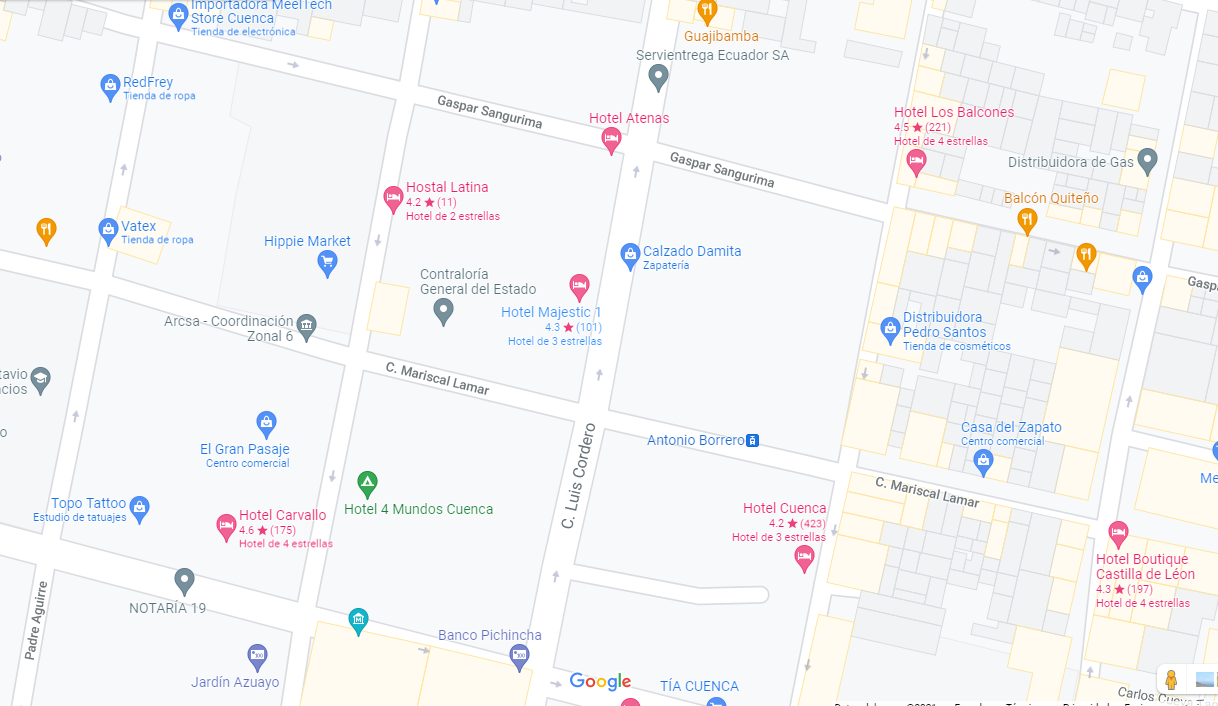

##Simulacion en Sim Traffic

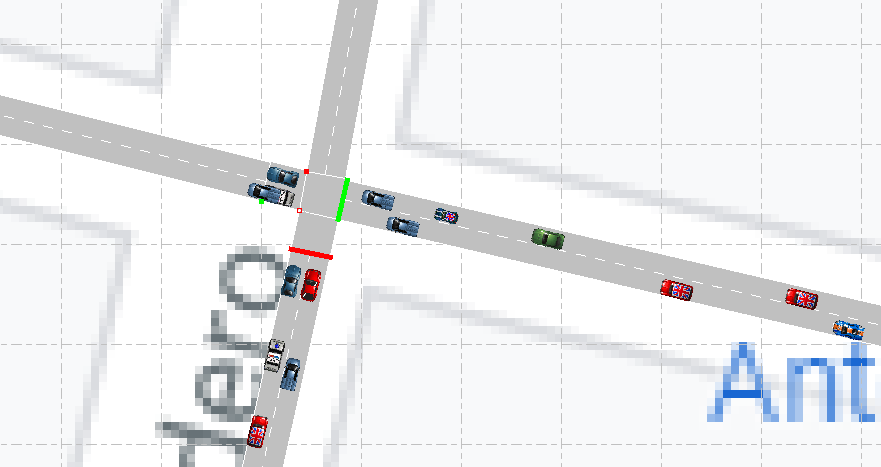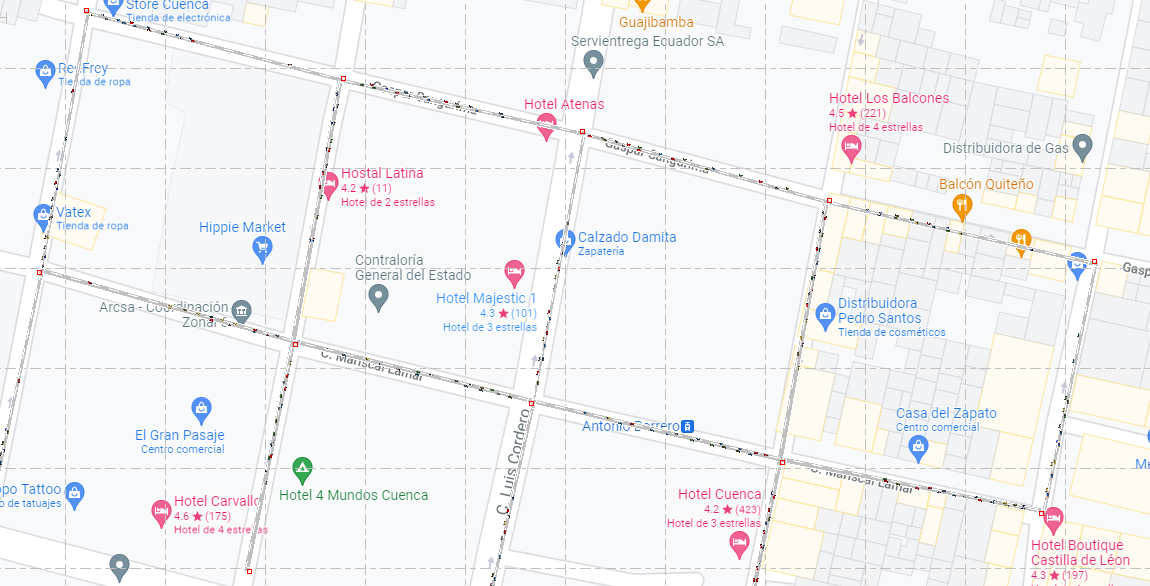

###Enlace de donde se obtuvo la iformacion del trafico de la ciudad
* http://dspace.uazuay.edu.ec/handle/datos/5350

Por otro lado generar un sistema de regresión que permita predecir el comportamiento del PIB del Ecuador para ello tomar los datos que están cargados dentro del AVAC solo del Ecuador, generar un cuaderno de python e incluir las secciones de Introducción, Resultados, Opinión, Conclusiones y Bibliografía.

In [ ]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "datos.csv"
df = pd.read_csv(url,engine='python',sep="\;",encoding='windows-1254')
df

,Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.911049,86.635116,82.525582,79.650264,79.933589,74.400324,70.497527,64.920863,63.101161,65.078967,68.552253,65.852535,66.161077,67.704518,63.782696,61.042300,67.813322,65.241349,76.509512,77.555556,73.517030,71.294029,73.332115,NaN,NaN,NaN
1,Afganist n,AFG,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,4.132233,4.453443,4.878051,9.171601,8.888893,11.258279,8.571429,6.772908,8.899677,10.094637,9.784002,10.922342,14.763231,12.948718,14.020619,12.676057,13.217391,11.662904,10.841750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.685831,75.388944,57.084996,54.321337,58.380346,65.526268,63.467863,67.905783,72.475028,58.757303,61.543113,60.669948,55.940131,50.747084,44.695031,29.754599,28.124485,29.004100,40.836290,40.556871,NaN
3,Albania,ALB,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.957492,23.810507,20.072918,18.852075,18.040331,16.820373,15.606180,16.029922,16.979394,18.593353,15.405064,7.484819,12.499591,15.978830,11.983694,12.640830,11.620439,10.197262,11.467112,16.841765,20.115364,21.333438,20.945651,20.847451,22.217551,23.012990,25.209597,28.247867,25.302402,25.240716,27.979449,29.241501,28.937487,28.916354,28.212979,27.267393,28.977864,31.569821,31.591574,31.555552,NaN
4,Andorra,AND,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.718210,5.612741,10.836509,11.298591,14.398461,16.083608,15.681982,17.075388,19.945479,23.630699,23.256504,21.929561,22.502021,21.937317,23.698127,26.649932,26.431364,29.215526,NaN
260,"Yemen, Rep. del",YEM,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,Sud frica,ZAF,Exportaciones de bienes y servicios (% del PIB),NE.EXP.GNFS.ZS,29.550915,29.323968,29.406919,28.613876,27.435897,25.704051,25.280453,24.570674,25.246734,23.001835,21.199453,21.274840,24.631502,24.623709,27.161136,26.843114,26.884288,29.307760,31.385478,34.166340,34.341152,27.470564,25.618592,23.956258,24.688004,30.442146,29.601592,29.308691,28.188242,25.867260,23.494921,21.098044,20.703737,21.

In [ ]:
df = df[df['Name'].isin(['Ecuador'])] #Filtro la informacion solo para Ecuador
# Luego selecciono las columnas de analisis
df = df.loc[:,['Name','1960','1961','1962','1963','1964','1965','1966','1967','1968',\
        '1968','1969','1970','1971','1972','1973','1974','1975','1976',\
        '1977','1978','1979','1980','1981','1982','1983','1984','1985',\
        '1986','1987','1988','1989','1990','1991','1992','1993','1994',\
        '1995','1996','1997','1998','1999','2000','2001','2002','2003',\
        '2004','2005','2006','2007','2008','2009','2010','2011','2012',\
        '2013','2014','2015','2016','2017','2018','2019']]
df = df.set_index('Name').T
ecua = df["Ecuador"].astype(int)
df['Ecuador'] = ecua
anios = df['Ecuador'].index.tolist()
df['Anios'] = anios
an = df["Anios"].astype(int)
df["Anios"] = an

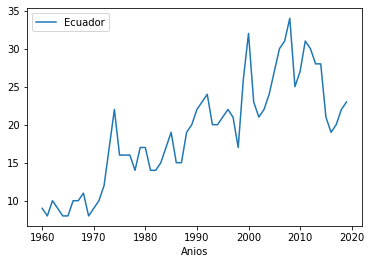

In [ ]:
df.plot(y="Ecuador", x="Anios")

In [ ]:
x = list(df.iloc [:, 0]) 
y = list(df.iloc [:, 1])
# Creamos el objeto de regresion Lineal
regr = linear_model.LinearRegression()

#Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1), y)

# Veamos los coeficientes obtenidos
print('Coeficintes: \n',regr.coef_)
# este es el valor en donde corta el eje Y en (X=0)
print("Independent term: \n",regr.intercept_)

Coeficintes: 
 [2.13272535]
Independent term: 
 1948.9404237135661


In [ ]:
#Quiero predecir el comportamiento del PIB (Producto Bruto Interno) 
y_prediccion = regr.predict([[100]])

print(int(y_prediccion))

2162


[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81
 82 83 84 85 86 87 88 89]


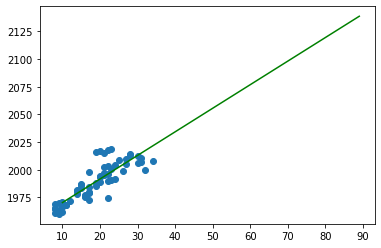

In [ ]:
plt.scatter(x,y)
x_real = np.array(range(10,90)) 
print(x_real)

plt.plot(x_real, regr.predict(x_real.reshape(-1,1)), color='green')
plt.show()

In [ ]:
x

[9,
 8,
 10,
 9,
 8,
 8,
 10,
 10,
 11,
 11,
 8,
 9,
 10,
 12,
 17,
 22,
 16,
 16,
 16,
 14,
 17,
 17,
 14,
 14,
 15,
 17,
 19,
 15,
 15,
 19,
 20,
 22,
 23,
 24,
 20,
 20,
 21,
 22,
 21,
 17,
 26,
 32,
 23,
 21,
 22,
 24,
 27,
 30,
 31,
 34,
 25,
 27,
 31,
 30,
 28,
 28,
 21,
 19,
 20,
 22,
 23]

In [ ]:
def modelo_logistico(x,a,b): 
    return a+b*np.log(x)
exp_fit = curve_fit(modelo_logistico,x,y)
print(exp_fit)

(array([1882.39851097,   37.3091618 ]), array([[ 66.61474569, -22.82928999],
       [-22.82928999,   7.97891718]]))


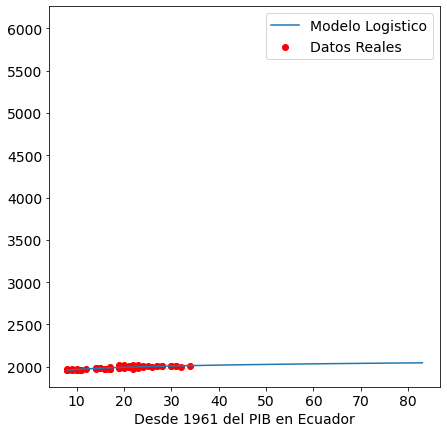

In [ ]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde 1961 del PIB en Ecuador")
plt.ylabel("")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

[1.07303055e-03 7.57519397e+00]


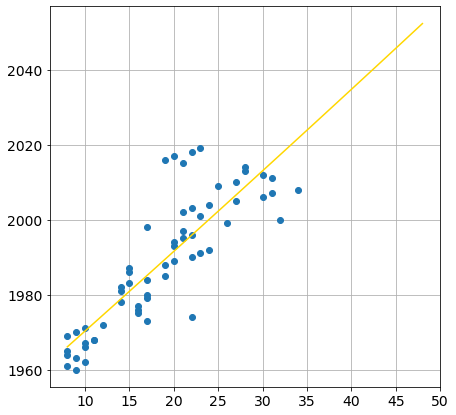

In [ ]:
curve_fit = np.polyfit(x, np.log(y), deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(x), max(x)+15)))
yx = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx, color="gold")
plt.grid(True)